# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/Hien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
#df_raw = pd.read_csv("../assets/admissions.csv")
df_raw = pd.read_csv("/Users/Hien/Dropbox/ex/DS-SF-44/projects/unit-projects/project-2/assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the range of data columns are different. GRE scores are in the hundreds thus have buckets of data where each standard deviation bucket is the length of 115.63. GPA scores are smaller rangers, no more than 4.0, thus have buckets of data with a deviation length of .38.

#### Question 4. Drop data points with missing data


In [5]:
df_raw_clean = df_raw.dropna()

In [6]:
df_raw_clean.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [7]:
df_raw_clean.tail()

,admit,gre,gpa,prestige
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


In [8]:
df_raw_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [9]:
print(df_raw_clean.isnull().sum())

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 
(1) Run the .count() function again to see how many records exist. If all Series/columns have the same count, it is a good assumption that the records with NaN are gone.

(2) Run print(df_raw_clean.isnull().sum()) to see how many NaNs exist in each row. 

Another way, review the data in its entirety to see if there are any NaNs. May take a while though.

Another way, use .isna() and .notna() to see which records are NaNs or not, respectively.

In [10]:
#!
print(df_raw_clean.notna())

     admit   gre   gpa  prestige
0     True  True  True      True
1     True  True  True      True
2     True  True  True      True
3     True  True  True      True
4     True  True  True      True
5     True  True  True      True
6     True  True  True      True
7     True  True  True      True
8     True  True  True      True
9     True  True  True      True
10    True  True  True      True
11    True  True  True      True
12    True  True  True      True
13    True  True  True      True
14    True  True  True      True
15    True  True  True      True
16    True  True  True      True
17    True  True  True      True
18    True  True  True      True
19    True  True  True      True
20    True  True  True      True
21    True  True  True      True
22    True  True  True      True
23    True  True  True      True
24    True  True  True      True
25    True  True  True      True
26    True  True  True      True
27    True  True  True      True
28    True  True  True      True
29    True

In [11]:
#2
print(df_raw_clean.isna())

     admit    gre    gpa  prestige
0    False  False  False     False
1    False  False  False     False
2    False  False  False     False
3    False  False  False     False
4    False  False  False     False
5    False  False  False     False
6    False  False  False     False
7    False  False  False     False
8    False  False  False     False
9    False  False  False     False
10   False  False  False     False
11   False  False  False     False
12   False  False  False     False
13   False  False  False     False
14   False  False  False     False
15   False  False  False     False
16   False  False  False     False
17   False  False  False     False
18   False  False  False     False
19   False  False  False     False
20   False  False  False     False
21   False  False  False     False
22   False  False  False     False
23   False  False  False     False
24   False  False  False     False
25   False  False  False     False
26   False  False  False     False
27   False  False  F

#### Question 6. Create box plots for GRE and GPA

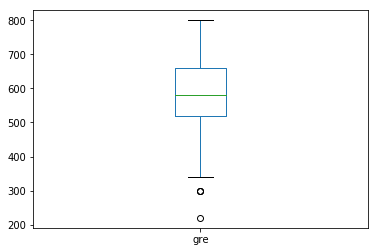

In [12]:
#boxplot 1
df_raw_clean.gre.plot.box()

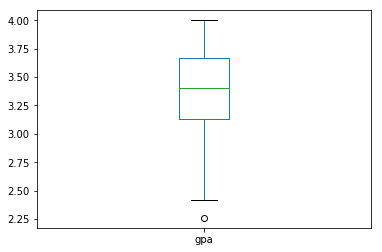

In [13]:
#boxplot 2 
df_raw_clean.gpa.plot.box()

#### Question 7. What do this plots show?

Answer: Box plots summarize the distribution of the data: the ranges min and max values of 99% of the data in each Series, the median, the 1st and 3rd quartiles with the calculated IQR/range of variation, and where the outlier is if it exists (towards the max vs the min) to determine the distribution's skewness.

gre:
    Min: ~275
    Max: ~800
    Median: ~560
    1st quartile: ~525
    3rd quartile: ~650
    Any outliers/skewness: ~325, ~210
    
gpa:
    Min: ~2.40
    Max: ~4.00
    Median: ~3.40
    1st quartile: ~3.15
    3rd quartile: ~3.60
    Any outliers/skewness: ~2.25    

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c15628a58>,
      dtype=object)

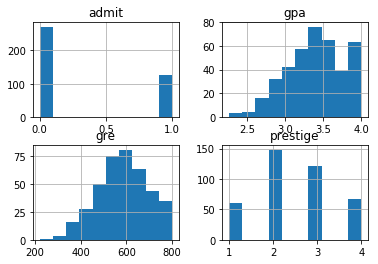

In [14]:
# plot the distribution of each variable 
df_raw_clean.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. because the our data looks to be Left Skewed. However, we could add samples of the data to our model if the sample sizes are more than 30, as these will likely be normal distributions (Central Limit Theorem).

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Remove the outlier records based on the gre and gpa series to create a normal distribution of the data.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
df_raw_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [16]:
# create a correlation matrix for the data
print(np.corrcoef(df_raw_clean))

[[1.         0.99998788 0.9999775  ... 0.9999939  0.99998999 0.99999604]
 [0.99998788 1.         0.99999625 ... 0.99999896 0.99999929 0.99999775]
 [0.9999775  0.99999625 1.         ... 0.99999364 0.99999726 0.99999158]
 ...
 [0.9999939  0.99999896 0.99999364 ... 1.         0.99999923 0.99999977]
 [0.99998999 0.99999929 0.99999726 ... 0.99999923 1.         0.99999843]
 [0.99999604 0.99999775 0.99999158 ... 0.99999977 0.99999843 1.        ]]


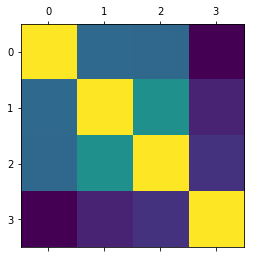

In [17]:
plt.matshow(df_raw_clean.corr())
## Not sure what this is telling me.

#### Question 12. What did you find?

Answer: The strongest correlation relationship between admit and any independent variable is prestige with a negative relationship, as prestige decreases the more likely the admit. Overall the comparison between each relationship is not very different. Though GRE is the most positive relationship, it GPA's relationship to admit is not so far behind. 

The strongest positive relationship between any 2 variables is between GRE and GPA, meaning as GRE score increases, it is likely the candidate has a higher GPA.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
(1) Determine the question we want to answer: What makes a good candidate for graduate school. Does prestige of undergraduate schools correlate with graduate school admissions?

(2) Review the distribution of the independent variable, prestige/rank. Use df_raw_clean.prestige.plot.box() to df_raw_clean.describe() to gather these descriptive stats.

(3) Transform the data to remove NaNs and outliers so that we are analyzing about 95% of the dataset and can then say our findings have a .05 probability of error (95% chance of being accurate).

(4) Use inferential stats to examine the covariance and correlation between prestige and admit. Use print(np.cov(df_raw_clean.prestige, df_raw_clean.admit)) to measure covariance/variance between the two variables and print(np.corrcoef(df_raw_clean.prestige, df_raw_clean.admit)) for the correlation/strength and direction of the relationship.
    (a) We could run stats on samples of the distribution in sizes >30 to test for the entire population's correlation but this is a sample in itself and is relatively good size to examine as a whole.

In [18]:
print(np.cov(df_raw_clean.prestige, df_raw_clean.admit))

[[ 0.89696715 -0.10750452]
 [-0.10750452  0.21719716]]


In [19]:
print(np.corrcoef(df_raw_clean.prestige, df_raw_clean.admit))

[[ 1.         -0.24356303]
 [-0.24356303  1.        ]]


#### Question 14. What is your hypothesis? 

Answer: 
Null Hypotheses: We have 2 to disprove:
(1) There is no correlation between the prestige of undergraduate schools with the admission to graduate school. 
(2) As prestige rank of undergraduate schools increases, the rate of admissions to graduate school either decreases or has no effect.

Hypothesis: As prestige rank of undergraduate schools increases, the rate of admissions to graduate school increases meaning a higher likelihood of the candidate being accepted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
(1) We could impute for missing data by taking the average of each Series and plug in, using .fillna(). See Bonus question #3 below.

(2) In general, maybe not for this data set, we could use algorithms that support missing values, such as k-Nearest Neighbors to ignor columns from a distance measure when a value is missing. Or classification and regression trees to use missing values as unique/different values to build a predictive model.

#### 2. Bonus: Log transform the skewed data
Source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html
Notes from Source: Adding 1 before taking the log ensures we don't end up with negative values. Also note that neither of these transformations work on data containing negative values. To make them work on data with negative values add a constant to each value that is large enough to make all the data greater than or equal to 1 (such as adding the absolute value of the smallest number +1)
Both the sqrt() and log() transforms reduced the skew of the data. It's still not quite normally distributed, but the amount of extreme data in the tails has been reduced to the point where we might not be so worried about it having a large influence on our results.

In [20]:
log_trans = (df_raw_clean+1).apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c167e6fd0>,
      dtype=object)

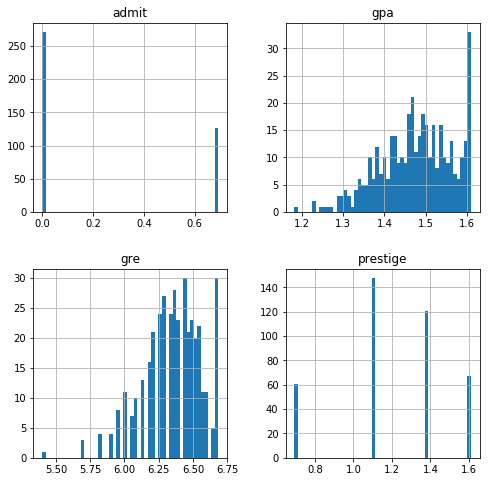

In [21]:
log_trans.hist(figsize = (8,8),bins=50)

#### 3. Advanced: Impute missing data
Source: https://pandas.pydata.org/pandas-docs/stable/missing_data.html
Source: https://machinelearningmastery.com/handle-missing-data-python/
There are many options we could consider when replacing a missing value, for example:

A constant value that has meaning within the domain, such as 0, distinct from all other values.
A value from another randomly selected record.
A mean, median or mode value for the column.
A value estimated by another predictive model.

In [22]:
# Impute median (it's sturdier than mean in a skewed dataset) for the series' missing values:
df_raw_clean_mdNaN = df_raw_clean.fillna(df_raw_clean.median())